# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
project_data = pd.read_csv('train_data.csv')
resources_data = pd.read_csv('resources.csv')

In [ ]:
project_data.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0


In [ ]:
project_data.describe()

,Unnamed: 0,teacher_number_of_previously_posted_projects,project_is_approved
count,109248.000000,109248.000000,109248.000000
mean,91183.786568,11.153165,0.848583
std,52548.095272,27.777154,0.358456
min,0.000000,0.000000,0.000000
25%,45743.500000,0.000000,1.000000
50%,91253.500000,2.000000,1.000000
75%,136712.500000,9.000000,1.000000
max,182079.000000,451.000000,1.000000


In [ ]:
project_data.shape

(109248, 17)

In [ ]:
resources_data.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


In [ ]:
value_counts = project_data['project_is_approved'].value_counts()

In [ ]:
print('the percentage of projects approved', value_counts[1]/ (value_counts[0]+value_counts[1])*100)

the percentage of projects approved 84.85830404217927


In [ ]:
print('the percentage of projects not approved', value_counts[0]/(value_counts[0]+value_counts[1])*100)

the percentage of projects not approved 15.141695957820739


# 1.2 Data Analysis

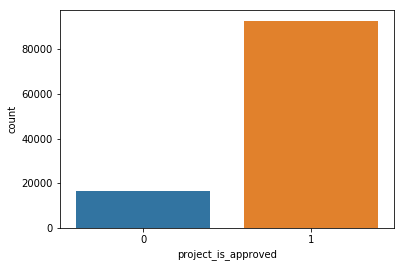

In [ ]:
sns.countplot(x='project_is_approved', data=project_data)

In [ ]:
project_data.head(5)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs,IN,2016-12-05 13:43:57,Grade_A,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr,FL,2016-10-25 09:22:10,Grade_D,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms,AZ,2016-08-31 12:03:56,Grade_D,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs,KY,2016-10-06 21:16:17,Grade_A,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs,TX,2016-07-11 01:10:09,Grade_A,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1


In [ ]:
project_data['teacher_prefix'].value_counts()

Mrs        57269
Ms         38955
Mr         10648
Teacher     2360
Dr            13
Name: teacher_prefix, dtype: int64

In [ ]:
project_data['teacher_prefix'].isnull().sum()

3

### 1.2.1 Univariate Analysis: School State

In [ ]:
#lowest percentage of projects approved by school states
temp = (pd.DataFrame(project_data.groupby(by='school_state')['project_is_approved'].apply(lambda x: np.mean(x))).reset_index()).sort_values(by='project_is_approved')

In [ ]:
temp.head()

,school_state,project_is_approved
2,AR,0.764706
25,MS,0.769231
44,UT,0.785714
31,NJ,0.794118
13,ID,0.807692


In [ ]:
temp.columns 

Index(['school_state', 'project_is_approved'], dtype='object')

In [ ]:
temp.columns = ['school_state', 'num_proposals']

In [ ]:
temp.head()

,school_state,num_proposals
2,AR,0.764706
25,MS,0.769231
44,UT,0.785714
31,NJ,0.794118
13,ID,0.807692


In [ ]:
temp.shape

(50, 2)

In [ ]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [ ]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

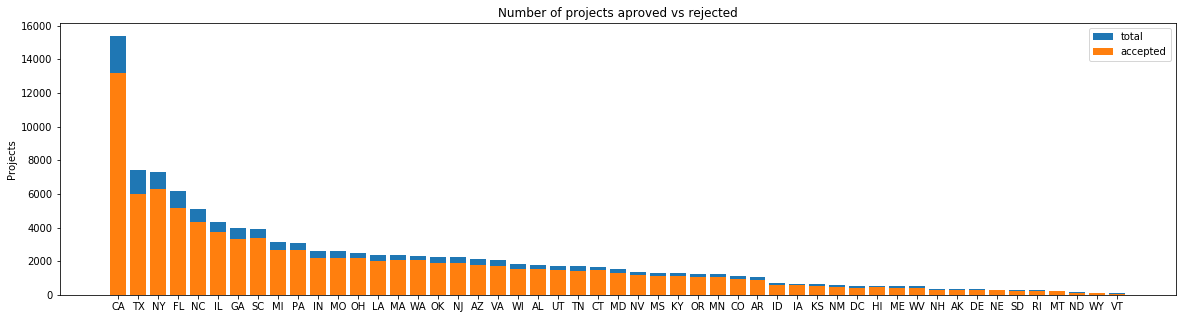

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [ ]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

__SUMMARY: Every state has greater than 80% success rate in approval__

### 1.2.2 Univariate Analysis: teacher_prefix

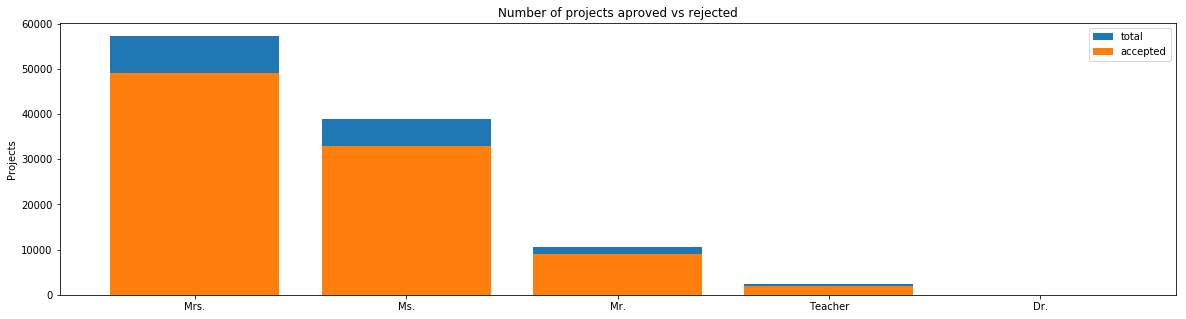

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [ ]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved', False)

### 1.2.3 Univariate Analysis: project_grade_category

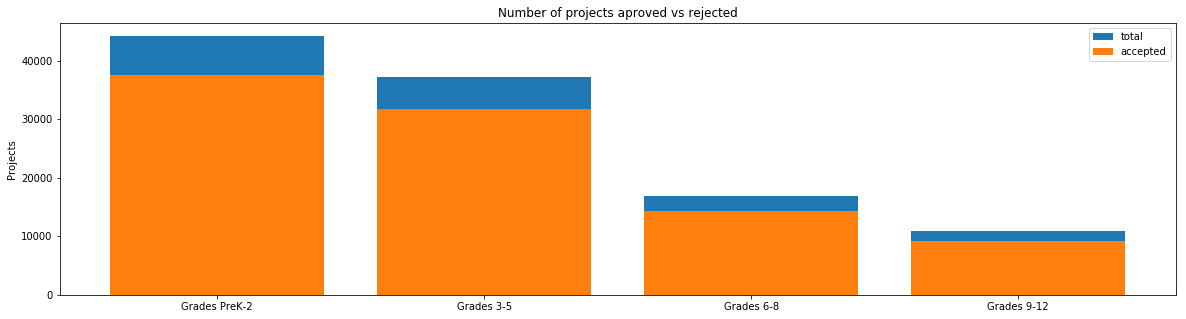

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [ ]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

### 1.2.4 Univariate Analysis: project_subject_categories

In [ ]:
xxx = list(project_data['project_subject_categories'])

In [ ]:
type(xxx)

list

In [ ]:
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

cat_list = []
for i in xxx:
    temp = ''
    for j in i.split(','):
        if 'The' in j.split():
            j = j.replace(' ', '')
            
        j = j.replace(' ','')
        temp +=j.strip()+' '
        temp = temp.replace('&', '_')
        
    cat_list.append(temp.strip())

In [ ]:
cat_list

['Literacy_Language',
 'History_Civics Health_Sports',
 'Health_Sports',
 'Literacy_Language Math_Science',
 'Math_Science',
 'Literacy_Language SpecialNeeds',
 'Literacy_Language SpecialNeeds',
 'Math_Science',
 'Health_Sports',
 'Literacy_Language',
 'Literacy_Language',
 'Literacy_Language AppliedLearning',
 'Math_Science',
 'SpecialNeeds',
 'Literacy_Language',
 'Health_Sports',
 'Literacy_Language SpecialNeeds',
 'Math_Science Literacy_Language',
 'AppliedLearning',
 'Health_Sports',
 'Literacy_Language',
 'Math_Science SpecialNeeds',
 'Literacy_Language',
 'Music_TheArts',
 'Math_Science',
 'Math_Science',
 'Literacy_Language Math_Science',
 'Literacy_Language Math_Science',
 'Literacy_Language SpecialNeeds',
 'Literacy_Language AppliedLearning',
 'Literacy_Language',
 'SpecialNeeds',
 'Math_Science Literacy_Language',
 'History_Civics',
 'Literacy_Language',
 'Health_Sports',
 'Literacy_Language Math_Science',
 'Health_Sports Literacy_Language',
 'Health_Sports',
 'Literacy_Lang

In [ ]:
project_data['clean_categories'] = cat_list
project_data.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,Math_Science


In [ ]:
project_data.drop(labels='project_subject_categories',axis = 1,  inplace=True)

In [ ]:
project_data.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language


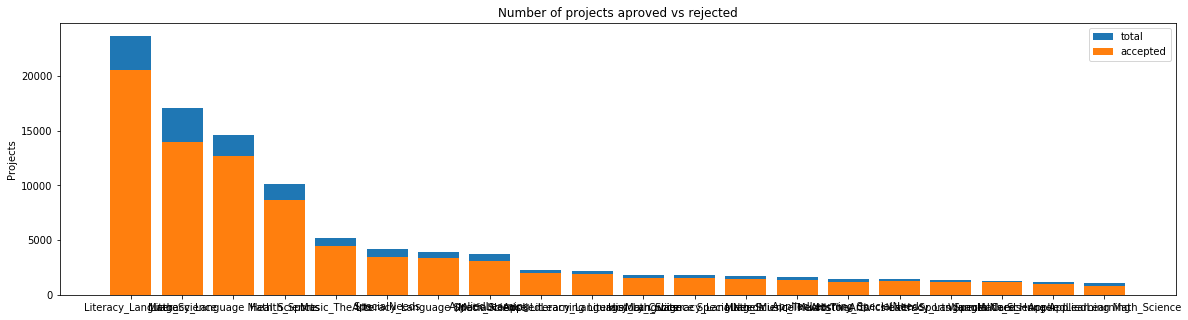

                  clean_categories  project_is_approved  total       Avg
24               Literacy_Language                20520  23655  0.867470
32                    Math_Science                13991  17072  0.819529
28  Literacy_Language Math_Science                12725  14636  0.869432
8                    Health_Sports                 8640  10177  0.848973
40                   Music_TheArts                 4429   5180  0.855019
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                 1271   1421  0.894441
14        Health_Sports SpecialNeeds                 1215   1391  0.873472
50                Warmth Care_Hunger                 1212   1309  0.925898
33      Math_Science AppliedLearning                 1019   1220  0.835246
4       AppliedLearning Math_Science                  855   1052  0.812738


In [ ]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

In [ ]:
#now we can see how many unique different project categories
#https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()

for i in project_data['clean_categories'].values:
    my_counter.update(i.split())

In [ ]:
my_counter

Counter({'AppliedLearning': 12135,
         'Care_Hunger': 1388,
         'Health_Sports': 14223,
         'History_Civics': 5914,
         'Literacy_Language': 52239,
         'Math_Science': 41421,
         'Music_TheArts': 10293,
         'SpecialNeeds': 13642,
         'Warmth': 1388})

In [ ]:
#converting it into python dict into dataframe to plot the bar plot 
#https://stackoverflow.com/questions/18837262/convert-python-dict-into-a-dataframe
xxx_1 = pd.DataFrame.from_dict(my_counter.items())
xxx_1

,0,1
0,Literacy_Language,52239
1,History_Civics,5914
2,Health_Sports,14223
3,Math_Science,41421
4,SpecialNeeds,13642
5,AppliedLearning,12135
6,Music_TheArts,10293
7,Warmth,1388
8,Care_Hunger,1388


In [ ]:
xxx_1.columns = ['unique_subject_categories', 'count']

#https://www.geeksforgeeks.org/python-pandas-dataframe-sort_values-set-1/
xxx_1.sort_values(by='count', axis=0, ascending=True, inplace=True)
xxx_1

,unique_subject_categories,count
7,Warmth,1388
8,Care_Hunger,1388
1,History_Civics,5914
6,Music_TheArts,10293
5,AppliedLearning,12135
4,SpecialNeeds,13642
2,Health_Sports,14223
3,Math_Science,41421
0,Literacy_Language,52239


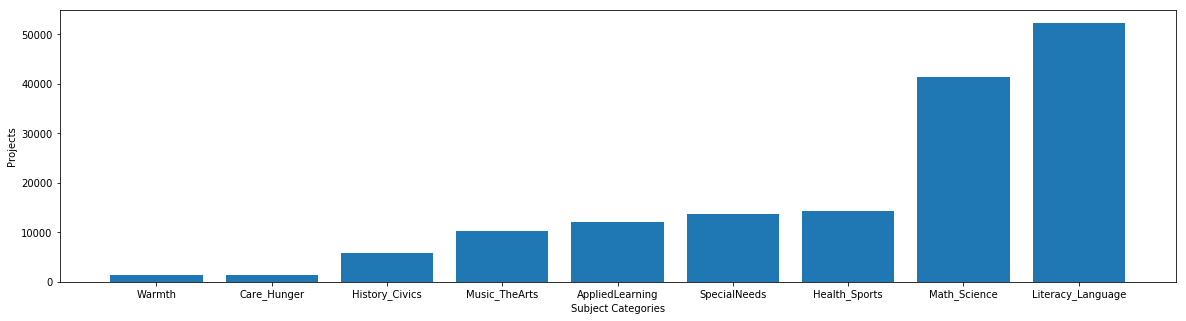

In [ ]:
#plot it
plt.figure(figsize=(20,5))
plt.bar(xxx_1['unique_subject_categories'], xxx_1['count'])
plt.xlabel('Subject Categories')
plt.ylabel('Projects')
plt.show()

### 1.2.5 Univariate Analysis: project_subject_subcategories

In [ ]:
project_data['project_subject_subcategories'].head()

0                       ESL, Literacy
1    Civics & Government, Team Sports
2      Health & Wellness, Team Sports
3               Literacy, Mathematics
4                         Mathematics
Name: project_subject_subcategories, dtype: object

In [ ]:
#Working on product_subject sub categories

sub_cat_list = []

for i in list(project_data['project_subject_subcategories'].values):
    
    temp = ''
    for j in i.split(','):
        if 'The' in j.split():
            j = j.replace('The', '')
            
        j = j.replace(' ','')
        temp += j.strip()+' '
        temp = temp.replace('&', '_')
        
    sub_cat_list.append(temp.strip())

In [ ]:
sub_cat_list

['ESL Literacy',
 'Civics_Government TeamSports',
 'Health_Wellness TeamSports',
 'Literacy Mathematics',
 'Mathematics',
 'Literature_Writing SpecialNeeds',
 'Literacy SpecialNeeds',
 'Mathematics',
 'Health_Wellness',
 'Literacy Literature_Writing',
 'Literacy',
 'Literacy ParentInvolvement',
 'EnvironmentalScience Health_LifeScience',
 'SpecialNeeds',
 'Literacy',
 'Health_Wellness',
 'Literacy SpecialNeeds',
 'AppliedSciences Literature_Writing',
 'EarlyDevelopment',
 'Health_Wellness',
 'Literacy',
 'Health_LifeScience SpecialNeeds',
 'Literacy',
 'Music',
 'AppliedSciences Mathematics',
 'Mathematics',
 'Literacy Mathematics',
 'ForeignLanguages Mathematics',
 'Literacy SpecialNeeds',
 'Literacy Other',
 'Literacy',
 'SpecialNeeds',
 'Health_LifeScience Literacy',
 'Economics FinancialLiteracy',
 'Literature_Writing',
 'TeamSports',
 'Literature_Writing Mathematics',
 'Health_Wellness Literacy',
 'Gym_Fitness Health_Wellness',
 'Literacy Literature_Writing',
 'Literacy Literature

In [ ]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(labels='project_subject_subcategories', axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports


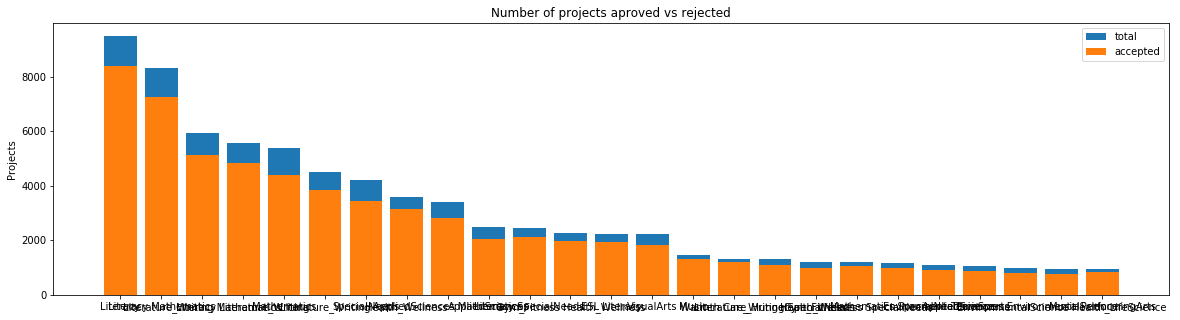

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7260   8325  0.872072
331  Literature_Writing Mathematics                 5140   5923  0.867803
318     Literacy Literature_Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
                         clean_subcategories  project_is_approved  total  \
188                     EnvironmentalScience                  894   1079   
396                               TeamSports                  864   1061   
8       AppliedSciences EnvironmentalScience                  785    984   
193  EnvironmentalScience Health_LifeScience                  782    964   
356                     Music PerformingArts                  840    948   

          Avg  
188  0.828545  
396  0.814326  
8    0.797764  
193  0.811203  
356  0.886076  


In [ ]:
#plot it
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=25)

In [ ]:
# counting the project cleaned subcategories
from collections import Counter
my_counter_sub = Counter()
    
for i in project_data['clean_subcategories'].values:
    my_counter_sub.update(i.split())

In [ ]:
my_counter_sub

Counter({'AppliedSciences': 10816,
         'Care_Hunger': 1388,
         'CharacterEducation': 2065,
         'Civics_Government': 815,
         'College_CareerPrep': 2568,
         'CommunityService': 441,
         'ESL': 4367,
         'EarlyDevelopment': 4254,
         'Economics': 269,
         'EnvironmentalScience': 5591,
         'Extracurricular': 810,
         'FinancialLiteracy': 568,
         'ForeignLanguages': 890,
         'Gym_Fitness': 4509,
         'Health_LifeScience': 4235,
         'Health_Wellness': 10234,
         'History_Geography': 3171,
         'Literacy': 33700,
         'Literature_Writing': 22179,
         'Mathematics': 28074,
         'Music': 3145,
         'NutritionEducation': 1355,
         'Other': 2372,
         'ParentInvolvement': 677,
         'PerformingArts': 1961,
         'SocialSciences': 1920,
         'SpecialNeeds': 13642,
         'TeamSports': 2192,
         'VisualArts': 6278,
         'Warmth': 1388})

In [ ]:
#convert it into dict
dict_sub = dict(my_counter_sub)

In [ ]:
#convert it into python dataframe so that we can bar plot it with projects
xxx_2 = pd.DataFrame.from_dict(dict_sub.items())
xxx_2.head()

,0,1
0,ESL,4367
1,Literacy,33700
2,Civics_Government,815
3,TeamSports,2192
4,Health_Wellness,10234


In [ ]:
#sort it
xxx_2.columns = ['cleaned_sub_categories', 'count']
xxx_2.sort_values(by='count', axis=0, inplace=True)
xxx_2.head()

,cleaned_sub_categories,count
16,Economics,269
26,CommunityService,441
17,FinancialLiteracy,568
8,ParentInvolvement,677
29,Extracurricular,810


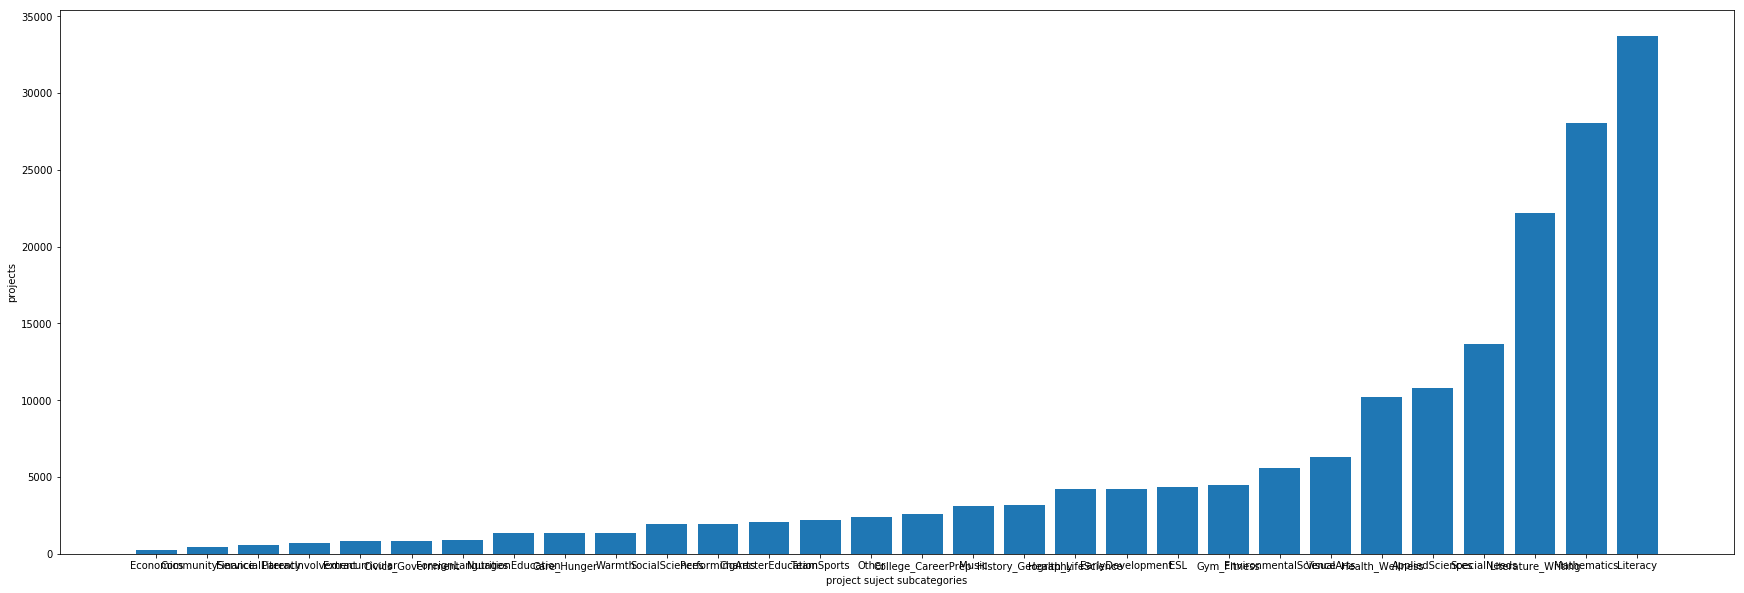

In [ ]:
#plot it
plt.figure(figsize=(30,10))
plt.bar(xxx_2['cleaned_sub_categories'], xxx_2['count'])
plt.xlabel('project suject subcategories')
plt.ylabel('projects')
plt.show()

### 1.2.6 Univariate Analysis: Text features (Title)

In [ ]:
# Looking for how many words in project title for each project
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)

In [ ]:
#convert into pandas dataframe so that we can plot
xxx_3 = pd.DataFrame.from_dict(word_dict.items())
xxx_3.columns = ['number of words in project title', 'count']
xxx_3.head(2)

,number of words in project title,count
0,4,19979
1,5,19677


In [ ]:
#sort it
xxx_3.sort_values(by='count', axis=0, ascending=True, inplace=True)
xxx_3.head()

,number of words in project title,count
12,13,1
11,12,11
10,11,30
9,1,31
8,10,3968


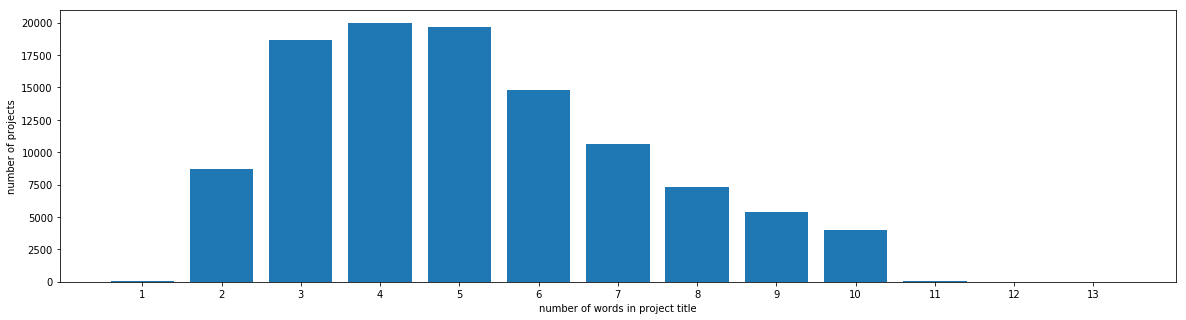

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(xxx_3['number of words in project title'], xxx_3['count'])
plt.xlabel('number of words in project title')
plt.ylabel('number of projects')
plt.xticks(xxx_3['number of words in project title'])
plt.show()

In [ ]:
#check how many words in the project where the project is approved
words_count_approved = project_data[project_data['project_is_approved']==1]
words_count_approved.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science,Literacy Mathematics


In [ ]:
#finding how many words in that
approved_word_count = words_count_approved['project_title'].str.split().apply(len)
approved_word_count = approved_word_count.values
approved_word_count

array([5, 2, 3, ..., 6, 5, 7], dtype=int64)

In [ ]:
rejected_word_count = project_data['project_title'].str.split().apply(len)
rejected_word_count = rejected_word_count.values
rejected_word_count

array([7, 5, 7, ..., 6, 5, 7], dtype=int64)

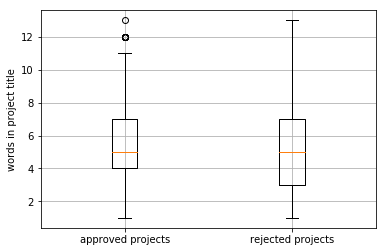

In [ ]:
#Box plot
plt.boxplot(x=[approved_word_count, rejected_word_count])
plt.xticks([1,2], ['approved projects', 'rejected projects'])
plt.ylabel('words in project title')
plt.grid()
plt.show()

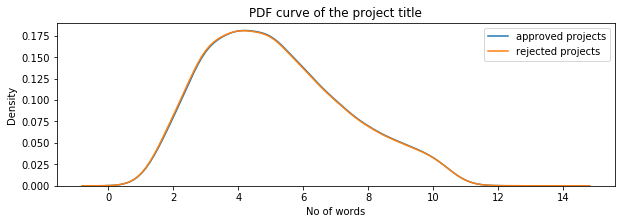

In [ ]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_word_count, label='approved projects', bw=0.6)
sns.kdeplot(rejected_word_count, label='rejected projects', bw=0.6)
plt.legend()
plt.title('PDF curve of the project title')
plt.xlabel('No of words')
plt.ylabel('Density')
plt.show()

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [ ]:
#merge all the essay columns
project_data['essay'] = project_data['project_essay_1'].map(str) +\ 
                        project_data['project_essay_2'].map(str) +\
                        project_data['project_essay_3'].map(str) +\
                        project_data['project_essay_4'].map(str)

In [ ]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...


In [ ]:
approved_word_count_essay = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count_essay =  approved_word_count_essay.values
approved_word_count_essay

array([221, 213, 234, ..., 181, 254, 263], dtype=int64)

In [ ]:
rejected_word_count_essay = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len).values
rejected_word_count_essay

array([272, 361, 219, ..., 211, 298, 317], dtype=int64)

No handles with labels found to put in legend.


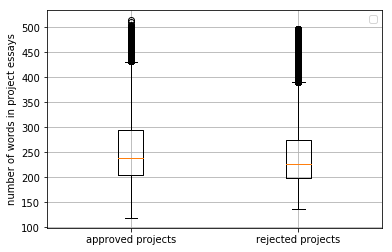

In [ ]:
plt.boxplot(x=[approved_word_count_essay, rejected_word_count_essay])
plt.xticks([1,2],['approved projects', 'rejected projects'])
plt.ylabel('number of words in project essays')
plt.legend()
plt.grid()
plt.show()

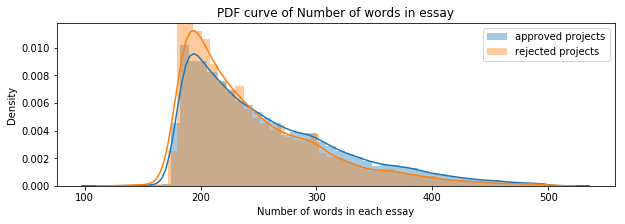

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count_essay, label='approved projects')
sns.distplot(rejected_word_count_essay, label='rejected projects')
plt.xlabel('Number of words in each essay')
plt.ylabel('Density')
plt.title('PDF curve of Number of words in essay')
plt.legend()
plt.show()

### 1.2.8 Univariate Analysis: Cost per project

In [ ]:
#Price only available on resource dataset
resources_data.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [ ]:
#Since there are too many id's repeated here so we can group it together based on same id
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price = resources_data.groupby(by='id')['price'].agg({'price':'sum', 'quantity':'sum'}).reset_index()
price.head(3)

,id,price,quantity
0,p000001,459.56,459.56
1,p000002,515.89,515.89
2,p000003,298.97,298.97


In [ ]:
#Since Ids are the same in both the dataset and we can join them like in SQL
project_data = pd.merge(project_data, price, how='left')
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.6,154.6
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.0,299.0


In [ ]:
#approved projects based on price
approved_price = project_data[project_data['project_is_approved']==1]['price'].values
approved_price

array([299.  , 232.9 ,  67.98, ..., 239.96,  73.05, 109.9 ])

In [ ]:
#rejected projects based on price
rejected_price = project_data[project_data['project_is_approved']==0]['price'].values
rejected_price

array([154.6 , 516.85, 219.46, ..., 747.  , 300.18, 737.95])

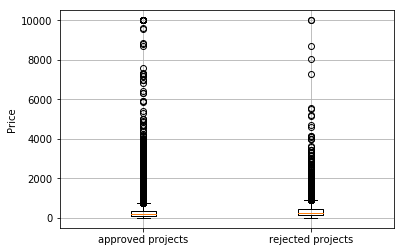

In [ ]:
#Boxplot
plt.boxplot(x=[approved_price, rejected_price])
plt.xticks([1,2],['approved projects', 'rejected projects'])
plt.ylabel('Price')
plt.grid()
plt.show()

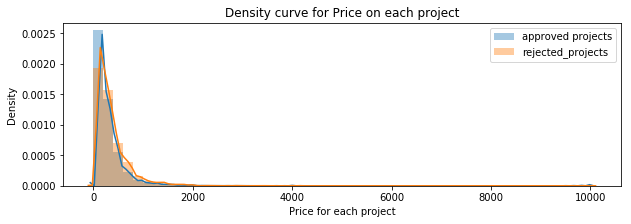

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, label='approved projects')
sns.distplot(rejected_price, label='rejected_projects')
plt.xlabel('Price for each project')
plt.ylabel('Density')
plt.title('Density curve for Price on each project')
plt.legend()
plt.show()

In [ ]:
project_data['price'].shape

(109248,)

In [ ]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ['percentile', 'approved projects', 'rejected projects']

for i in range(0,101,5):
    x.add_row([i, np.round(np.percentile(approved_price, i),3), np.round(np.percentile(rejected_price,i), 3)])

print(x)

+------------+-------------------+-------------------+
| percentile | approved projects | rejected projects |
+------------+-------------------+-------------------+
|     0      |        0.66       |        1.97       |
|     5      |       13.59       |        41.9       |
|     10     |       33.88       |       73.67       |
|     15     |        58.0       |       99.109      |
|     20     |       77.38       |       118.56      |
|     25     |       99.95       |      140.892      |
|     30     |       116.68      |       162.23      |
|     35     |      137.232      |      184.014      |
|     40     |       157.0       |      208.632      |
|     45     |      178.265      |      235.106      |
|     50     |       198.99      |      263.145      |
|     55     |       223.99      |       292.61      |
|     60     |       255.63      |      325.144      |
|     65     |      285.412      |       362.39      |
|     70     |      321.225      |       399.99      |
|     75  

<h3><font color='red'>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</font></h3>

In [ ]:
#Now we can do the same to the teacher_number_of_previously_posted_projects
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.6,154.6
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.0,299.0


In [ ]:
previously_teacher_approved_projects = project_data[project_data['project_is_approved']==1]['teacher_number_of_previously_posted_projects'].values
previously_teacher_approved_projects

array([7, 4, 1, ..., 3, 0, 0], dtype=int64)

In [ ]:
previously_teacher_rejected_projects = project_data[project_data['project_is_approved']==0]['teacher_number_of_previously_posted_projects'].values
previously_teacher_rejected_projects

array([0, 1, 5, ..., 4, 0, 1], dtype=int64)

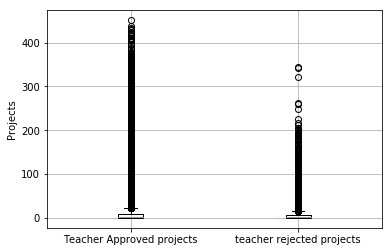

In [ ]:
#Boxplot
plt.boxplot(x=[previously_teacher_approved_projects, previously_teacher_rejected_projects])
plt.xticks([1,2], ['Teacher Approved projects', 'teacher rejected projects'])
plt.ylabel('Projects')
plt.grid()
plt.show()

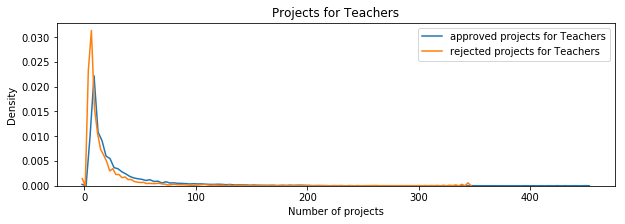

In [ ]:
#Distplot
plt.figure(figsize=(10,3))
sns.distplot(previously_teacher_approved_projects, hist=False, label='approved projects for Teachers')
sns.distplot(previously_teacher_rejected_projects, hist=False, label='rejected projects for Teachers')
plt.title('Projects for Teachers')
plt.xlabel('Number of projects')
plt.ylabel('Density')
plt.legend()
plt.show()

<h3><font color='red'>1.2.10 Univariate Analysis: project_resource_summary</font></h3>

In [ ]:
#Now we can look on the project_resource_summary
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.6,154.6
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.0,299.0


In [ ]:
#Number of words on each summary when projecte is approved
word_count_summary_approved = project_data[project_data['project_is_approved']==1]['project_resource_summary'].str.split().apply(len).values
word_count_summary_approved

array([11, 20, 26, ..., 36, 15, 27], dtype=int64)

In [ ]:
#Number of words on each summary when projecte is rejected
word_count_summary_rejected = project_data[project_data['project_is_approved']==0]['project_resource_summary'].str.split().apply(len).values
word_count_summary_rejected

array([13, 19, 32, ..., 19, 11, 18], dtype=int64)

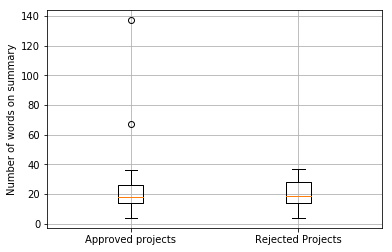

In [ ]:
#boxplot
plt.boxplot([word_count_summary_approved, word_count_summary_rejected])
plt.xticks([1,2],['Approved projects', 'Rejected Projects'])
plt.ylabel('Number of words on summary')
plt.grid()
plt.show()

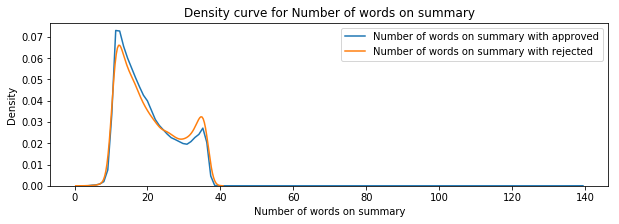

In [ ]:
#Dist plot
plt.figure(figsize=(10,3))
sns.distplot(word_count_summary_approved, hist=False, label='Number of words on summary with approved')
sns.distplot(word_count_summary_rejected, hist=False, label='Number of words on summary with rejected')
plt.xlabel('Number of words on summary')
plt.title('Density curve for Number of words on summary')
plt.ylabel('Density')
plt.legend()
plt.show()

## 1.3 Text preprocessing

### 1.3.1 Essay Text

In [ ]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.6,154.6
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.0,299.0


In [ ]:
project_data['essay'].values[2000]

"Describing my students isn't an easy task.  Many would say that they are inspirational, creative, and hard-working.  They are all unique - unique in their interests, their learning, their abilities, and so much more.  What they all have in common is their desire to learn each day, despite difficulties that they encounter.  \\r\\nOur classroom is amazing - because we understand that everyone learns at their own pace.  As the teacher, I pride myself in making sure my students are always engaged, motivated, and inspired to create their own learning! \\r\\nThis project is to help my students choose seating that is more appropriate for them, developmentally.  Many students tire of sitting in chairs during lessons, and having different seats available helps to keep them engaged and learning.\\r\\nFlexible seating is important in our classroom, as many of our students struggle with attention, focus, and engagement.  We currently have stability balls for seating, as well as regular chairs, bu

In [ ]:
#Remove the contracting words in that essay
# https://stackoverflow.com/a/47091490/4084039

def decontract(phrase):
    
    phrase = re.sub(r" won't", 'will not', phrase)
    phrase = re.sub(r"can't", 'can not', phrase)
    
    phrase = re.sub(r"n\'t", 'not', phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
import re
sent = decontract(project_data['essay'].values[20000])
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids donot want to sit and do worksheets. They want to learn to count by jumping and playing.

In [ ]:
# removing the line breaks
# http://texthandler.com/info/remove-line-breaks-python/

sent = sent.replace("\\r", ' ')
sent = sent.replace("\\n", ' ')
sent = sent.replace('\\"', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids donot want to sit and do worksheets. They want to learn to count by jumping and playing. Physi

In [ ]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids donot want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the 

In [ ]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
#Combining all the above statements
from tqdm import tqdm

proocessed_essay = []
for i in tqdm(project_data['essay'].values):
    
    sent = decontract(i)
    sent = sent.replace("\\r", ' ')
    sent = sent.replace("\\n", ' ')
    sent = sent.replace("\\'", ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    
    sent = ' '.join(j for j in sent.split() if j not in stopwords)
    proocessed_essay.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [01:59<00:00, 911.29it/s]


<h3><font color='red'>1.3.2 Project title Text</font></h3>

In [ ]:
Processed_title = []

for i in tqdm(project_data['project_title'].values):
    sent = decontract(i)
    sent = sent.replace("\\r", ' ')
    sent = sent.replace("\\n", ' ')
    sent = sent.replace("\\'", ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    
    sent = ' '.join(j for j in sent.split() if j not in stopwords)
    Processed_title.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:04<00:00, 26215.20it/s]


In [ ]:
Processed_title

['educational support english learners home',
 'wanted projector hungry learners',
 'soccer equipment awesome middle school students',
 'techie kindergarteners',
 'interactive math tools',
 'flexible seating mrs jarvis terrific third graders',
 'chromebooks special education reading program',
 'it 21st century',
 'targeting more success class',
 'just for love reading pure pleasure',
 'reading changes lives',
 'elevating academics parent rapports through technology',
 'building life science experiences',
 'everyone deserves heard',
 'tablets can show us the world',
 'making recess active',
 'making great leap with leapfrog',
 'technology teaches tomorrow talents today',
 'test time',
 'wiggling our way success',
 'magic carpet ride our library',
 'from sitting standing classroom',
 'books budding intellectuals',
 'instrumental power conquering steam',
 's t e a m challenges science technology engineering art math',
 'math masters',
 'techy teaching',
 '4th grade french immersion class 

## 1. 4 Preparing data for models

In [ ]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

In [ ]:
# to check all the defined variables
# https://stackoverflow.com/questions/633127/viewing-all-defined-variables
%whos

Variable                               Type           Data/Info
---------------------------------------------------------------
Counter                                type           <class 'collections.Counter'>
PrettyTable                            type           <class 'prettytable.PrettyTable'>
Processed_title                        list           n=109248
approved_price                         ndarray        92706: 92706 elems, type `float64`, 741648 bytes (724.265625 kb)
approved_word_count                    ndarray        92706: 92706 elems, type `int64`, 741648 bytes (724.265625 kb)
approved_word_count_essay              ndarray        92706: 92706 elems, type `int64`, 741648 bytes (724.265625 kb)
cat_list                               list           n=109248
decontract                             function       <function decontract at 0x0000011127434D08>
dict_sub                               dict           n=30
i                                      str            Classroom 

In [ ]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(cat_list, lowercase=False, binary=True)
vectorizer.fit(project_data['clean_categories'].values)
print(vectorizer.get_feature_names)

<bound method CountVectorizer.get_feature_names of CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8',
        input=['Literacy_Language', 'History_Civics Health_Sports', 'Health_Sports', 'Literacy_Language Math_Science', 'Math_Science', 'Literacy_Language SpecialNeeds', 'Literacy_Language SpecialNeeds', 'Math_Science', 'Health_Sports', 'Literacy_Language', 'Literacy_Language', 'Literacy_Language AppliedLear...ce', 'Literacy_Language Math_Science', 'Health_Sports SpecialNeeds', 'AppliedLearning Math_Science'],
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)>


In [ ]:
categories_one_hot = vectorizer.transform(project_data['clean_categories'].values)
print('Shape after one hot encoding of features', categories_one_hot.shape)

Shape after one hot encoding of features (109248, 9)


In [ ]:
#For subcategories
vectorizer = CountVectorizer(sub_cat_list, lowercase=False, binary=True)
vectorizer.fit(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names)

<bound method CountVectorizer.get_feature_names of CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8',
        input=['ESL Literacy', 'Civics_Government TeamSports', 'Health_Wellness TeamSports', 'Literacy Mathematics', 'Mathematics', 'Literature_Writing SpecialNeeds', 'Literacy SpecialNeeds', 'Mathematics', 'Health_Wellness', 'Literacy Literature_Writing', 'Literacy', 'Literacy ParentInvolvement', 'Environm...hematics', 'Literacy Mathematics', 'Health_Wellness SpecialNeeds', 'College_CareerPrep Mathematics'],
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)>


In [ ]:
sub_categories_one_hot = vectorizer.transform(project_data['clean_subcategories'].values)
print('the shape of the sub categories after one hot encoding', sub_categories_one_hot.shape)

the shape of the sub categories after one hot encoding (109248, 30)


## For School State

In [ ]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.6,154.6
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.0,299.0


In [ ]:
vectorizer = CountVectorizer(list(project_data['school_state'].values), lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names)

school_state_onehot_encoded = vectorizer.transform(project_data['school_state'].values)
print('the shape of the state after onehot encoded', school_state_onehot_encoded.shape)

<bound method CountVectorizer.get_feature_names of CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8',
        input=['IN', 'FL', 'AZ', 'KY', 'TX', 'FL', 'CT', 'GA', 'SC', 'NC', 'CA', 'CA', 'NY', 'OK', 'MA', 'TX', 'FL', 'NV', 'GA', 'OH', 'PA', 'NC', 'CA', 'AL', 'FL', 'AL', 'TX', 'LA', 'GA', 'VA', 'IN', 'NC', 'NC', 'AR', 'CA', 'NY', 'WA', 'TX', 'CA', 'FL', 'CA', 'OK', 'WV', 'NV', 'LA', 'ID', 'TX', 'TN', 'CT',...AZ', 'MD', 'AZ', 'NY', 'TX', 'OH', 'IN', 'WI', 'MN', 'MD', 'MD', 'SC', 'MO', 'NJ', 'NJ', 'NY', 'VA'],
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)>
the shape of the state after onehot encoded (109248, 51)


In [ ]:
with open('school_state_one_hot', 'wb') as f:
    pickle.dump(school_state_onehot_encoded, f)

## For teacher prefix

In [ ]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.6,154.6
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.0,299.0


In [ ]:
# https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
project_data[project_data['teacher_prefix'].isnull()]

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity
7820,17809,p180947,834f75f1b5e24bd10abe9c3dbf7ba12f,NaN,CA,2016-11-04 00:15:45,Grades 3-5,1:7 Increasing Tech to Decrease Achievement Gaps,The children at Anna Yates Elementary school a...,My goal is to bring in 1 laptop for every 7 st...,NaN,NaN,My students need a classroom laptop that is ju...,1,1,Literacy_Language Math_Science,Literature_Writing Mathematics,The children at Anna Yates Elementary school a...,910.87,910.87
30368,22174,p002730,339bd5a9e445d68a74d65b99cd325397,NaN,SC,2016-05-09 09:38:40,Grades 9-12,iPads for STEM Stations,"Within the next 20 years, every job will invol...",The students in our school come from a wide va...,Students will use the iPad station for individ...,Your generosity will allow my students to work...,My students need 5 iPads for STEM stations.,0,1,Literacy_Language,Literature_Writing,"Within the next 20 years, every job will invol...",285.86,285.86
57654,158692,p197901,e4be6aaaa887d4202df2b647fbfc82bb,NaN,PA,2016-06-03 10:15:05,Grades 3-5,Document Camera,Students at Robertsdale Elementary live in a l...,This SMART Document Camera will improve my stu...,NaN,NaN,My students need a Smart Document Camera to en...,0,1,Literacy_Language Math_Science,Literacy Mathematics,Students at Robertsdale Elementary live in a l...,145.29,145.29


If we see all the NaN values in teacher_prefix have the project_is_approved =1. Also during our EDA we have seen the probability project with teacher_prefix of 'Mrs' gets approved is high. So i am going to rename this NaN to 'Mrs'

In [ ]:
#https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string
project_data['teacher_prefix'] = (project_data['teacher_prefix'].fillna('Mrs'))

In [ ]:
# https://www.geeksforgeeks.org/python-string-replace/

project_data['teacher_prefix'] = project_data['teacher_prefix'].replace({'Mr.': 'Mr',
                                        'Ms.': 'Ms',
                                        'Mrs.': 'Mrs',
                                        'Dr.'  : 'Dr',
                                        'Teacher' : 'Tr',
                                         })

In [ ]:
project_data['teacher_prefix'].shape

(109248,)

In [ ]:
project_data['teacher_prefix'].unique()

array(['Mrs', 'Mr', 'Ms', 'Tr', 'Dr'], dtype=object)

In [ ]:
vectorizer = CountVectorizer(list(project_data['teacher_prefix'].values), lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values)

teacher_prefix_onehot_encoded = vectorizer.transform(project_data['teacher_prefix'].values)

print('the shape of the teacher prefix after one hot encoded', teacher_prefix_onehot_encoded.shape)

the shape of the teacher prefix after one hot encoded (109248, 5)


In [ ]:
teacher_prefix_onehot_encoded.toarray()[:5]

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0]], dtype=int64)

Now it looks like it encoded correctly only for the Prefixes.

In [ ]:
teacher_prefix_onehot_encoded.shape

(109248, 5)

In [ ]:
#pickling the teacher_prefix
import pickle
with open('teacher_prefix_one_hot', 'wb') as f:
    pickle.dump(teacher_prefix_onehot_encoded, f)

## For project grade category

In [ ]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity
61,175822,p046845,97f18c16914244c16db8a02260b2b488,Mrs.,SC,2016-05-03 18:39:03,Grades PreK-2,Forming MAGnificent Minds!,"\""Imagination Decides Everything.\"" -Blaise Pa...",Our school is high poverty. We recently earne...,These young engineers will use the Magformers ...,This project will have a magnificent impact on...,My students need Magformers to create and buil...,2,1,Math_Science,AppliedSciences Mathematics,"\""Imagination Decides Everything.\"" -Blaise Pa...",73.45,73.45
92,167398,p002482,c27352b1817b956e2bd722897d9a6552,Ms.,HI,2016-04-29 16:21:09,Grades 3-5,Help Keep Us Motivated!,Do you remember working hard towards that spec...,My students are diverse in their grade levels ...,"As the School Behavior Health Specialist, I wo...",These incentive materials will help to impact ...,My students need stimulating incentives to mot...,2,1,AppliedLearning Health_Sports,CharacterEducation Health_Wellness,Do you remember working hard towards that spec...,180.83,180.83


In [ ]:
project_data['project_grade_category'].unique()

array(['Grades PreK-2', 'Grades 3-5', 'Grades 9-12', 'Grades 6-8'],
      dtype=object)

We can see that there are only 4 categories in project grade category

In [ ]:
project_data['project_grade_category'] = project_data['project_grade_category'].replace({'Grades PreK-2': 'Grade_A',
                                                'Grades 3-5' : 'Grade_B',
                                                'Grades 9-12': 'Grade_C',
                                                'Grades 6-8' : 'Grade_D'})

In [ ]:
project_data.shape

(109248, 17)

In [ ]:
project_data['project_grade_category'].shape

(109248,)

In [ ]:
vectorizer = CountVectorizer(list(project_data['project_grade_category'].values), lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'].values)
#print(vectorizer.get_feature_names)

print('='*50)
grade_onehot_encoded = vectorizer.transform(project_data['project_grade_category'].values)
print('the shape of the matrix after one hot encoding of project grade category',grade_onehot_encoded)

the shape of the matrix after one hot encoding of project grade category   (0, 0)	1
  (1, 3)	1
  (2, 3)	1
  (3, 0)	1
  (4, 0)	1
  (5, 1)	1
  (6, 3)	1
  (7, 1)	1
  (8, 0)	1
  (9, 0)	1
  (10, 1)	1
  (11, 0)	1
  (12, 3)	1
  (13, 0)	1
  (14, 0)	1
  (15, 1)	1
  (16, 0)	1
  (17, 1)	1
  (18, 0)	1
  (19, 1)	1
  (20, 0)	1
  (21, 3)	1
  (22, 2)	1
  (23, 3)	1
  (24, 0)	1
  :	:
  (109223, 3)	1
  (109224, 0)	1
  (109225, 0)	1
  (109226, 1)	1
  (109227, 1)	1
  (109228, 0)	1
  (109229, 0)	1
  (109230, 2)	1
  (109231, 2)	1
  (109232, 1)	1
  (109233, 3)	1
  (109234, 1)	1
  (109235, 0)	1
  (109236, 1)	1
  (109237, 1)	1
  (109238, 0)	1
  (109239, 3)	1
  (109240, 0)	1
  (109241, 1)	1
  (109242, 0)	1
  (109243, 0)	1
  (109244, 0)	1
  (109245, 0)	1
  (109246, 1)	1
  (109247, 3)	1


In [ ]:
grade_onehot_encoded.shape

(109248, 4)

In [ ]:
grade_onehot_encoded.toarray()[:5]

array([[1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0]], dtype=int64)

It also shows that the project grade category has one hot encoded correctly

In [ ]:
with open('grade_one_hot', 'wb') as f:
    pickle.dump(grade_onehot_encoded, f)

### 1.4.2 Vectorizing Text data

#### 1.4.2.1 Bag of words

In [ ]:
%whos

Variable                               Type               Data/Info
-------------------------------------------------------------------
CountVectorizer                        type               <class 'sklearn.feature_e<...>on.text.CountVectorizer'>
Counter                                type               <class 'collections.Counter'>
PrettyTable                            type               <class 'prettytable.PrettyTable'>
Processed_title                        list               n=109248
approved_price                         ndarray            92706: 92706 elems, type `float64`, 741648 bytes (724.265625 kb)
approved_word_count                    ndarray            92706: 92706 elems, type `int64`, 741648 bytes (724.265625 kb)
approved_word_count_essay              ndarray            92706: 92706 elems, type `int64`, 741648 bytes (724.265625 kb)
cat_list                               list               n=109248
categories_one_hot                     csr_matrix           (0, 4)	1\n 

In [ ]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow_essay = vectorizer.fit_transform(proocessed_essay)
print('Shape of the matrix after one hot encoding', text_bow_essay.shape)

Shape of the matrix after one hot encoding (109248, 16647)


<h4><font color='red'> 1.4.2.2 Bag of Words on `project_title`</font></h4>

In [ ]:
vectorizer = CountVectorizer(min_df=10)
text_bow_title = vectorizer.fit_transform(Processed_title)
print('The shape of the matrix after one hot encoding', text_bow_title.shape)

The shape of the matrix after one hot encoding (109248, 3335)


#### 1.4.2.3 TFIDF vectorizer

In [ ]:
#For preprocessed essay
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf_essay= vectorizer.fit_transform(proocessed_essay)
print('Shape of the matrix after one hot encoding', text_tfidf_essay.shape)

Shape of the matrix after one hot encoding (109248, 16647)


<h4><font color='red'> 1.4.2.4 TFIDF Vectorizer on `project_title`</font></h4>

In [ ]:
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(Processed_title)
print('Shape of the matrix after TFIDF', text_tfidf.shape)

Shape of the matrix after TFIDF (109248, 3335)


#### 1.4.2.5 Using Pretrained Models: Avg W2V

In [ ]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel(r'D:\Others\Pictures\model downloads\Glove\glove.42B.300d.txt')


Loading Glove Model


1917494it [05:59, 5337.79it/s]


Done. 1917494  words loaded!


In [ ]:
words = []
for i in proocessed_essay:
    words.extend(i.split(' '))

for i in Processed_title:
    words.extend(i.split(' '))
    
print('the length of the corpus', len(words))
words = set(words)
print('The unique words in the corpus', len(words))

the length of the corpus 17012070
The unique words in the corpus 59180


In [ ]:
#Intersected words
inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(" ,np.round(len(inter_words)/len(words)*100, 3),"%)")

The number of words that are present in both glove vectors and our coupus 51533 ( 87.078 %)


In [ ]:
word_corpus = {}
word_glove = set(model.keys())

for i in words:
    if i in word_glove:
        word_corpus[i] = model[i]
print('the word2vec length', len(word_corpus))

the word2vec length 51533


In [ ]:
#Pickling the model http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(word_corpus, f)


In [ ]:
#Unpickling
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words = set(model.keys())

In [ ]:
#Avgw2V vector for preprcessed essay

avg_w2v_vector = []

for i in tqdm(proocessed_essay):
    vector = np.zeros(300)
    cnt_words = 0
    
    for word in i.split():
        if word in glove_words:
            vector += model[word]
            cnt_words +=1
            
    if cnt_words !=0:
            vector /= cnt_words
            
    avg_w2v_vector.append(vector)
    
print(len(avg_w2v_vector))
print(len(avg_w2v_vector[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:06<00:00, 1640.91it/s]


109248
300


<h4><font color='red'> 1.4.2.6 Using Pretrained Models: AVG W2V on `project_title`</font></h4>

In [ ]:
#avg_w2v for processed title

avg_W2V_vectors = []; 
for sentence in tqdm(Processed_title): 
    vector = np.zeros(300) 
    cnt_words =0; 
    for word in sentence.split():
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_W2V_vectors.append(vector)

print(len(avg_W2V_vectors))
print(len(avg_W2V_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:03<00:00, 28745.03it/s]


109248
300


#### 1.4.2.7 Using Pretrained Models: TFIDF weighted W2V

In [ ]:
Tf_idf_model = TfidfVectorizer()
Tf_idf_model.fit(proocessed_essay)

dictionary = dict(zip(Tf_idf_model.get_feature_names(), Tf_idf_model.idf_))
tf_idf_words = set(Tf_idf_model.get_feature_names())

In [ ]:
# TFIDF Word2Vec
# compute TFIDF word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(proocessed_essay): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tf_idf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [05:06<00:00, 356.08it/s]


109248
300


<h4><font color='red'> 1.4.2.9 Using Pretrained Models: TFIDF weighted W2V on `project_title`</font></h4>

In [ ]:
# TFIDF Word2Vec
# compute TFIDF word2vec for each review.
tfidf_W2V_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(Processed_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tf_idf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_W2V_vectors.append(vector)

print(len(tfidf_W2V_vectors))
print(len(tfidf_W2V_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:06<00:00, 16855.18it/s]


109248
300


### 1.4.3 Vectorizing Numerical features

In [ ]:
project_data['price'].shape

(109248,)

In [ ]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [ ]:
price_standardised = price_scalar.transform(project_data['price'].values.reshape(-1,1))

In [ ]:
price_standardised

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

### 1.4.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [ ]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow_essay.shape)
print(price_standardised.shape)

(109248, 9)
(109248, 30)
(109248, 16647)
(109248, 1)


### Merging the BOW for processed essays

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow_essay, price_standardised))

In [ ]:
print(X.shape)

(109248, 16687)


<h1><font color='red'>Assignment 2: Apply TSNE<font></h1>

<h2> 2.1 TSNE with `BOW` encoding of `project_title` feature </h2>

In [ ]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow_title.shape)
print(price_standardised.shape)

(109248, 9)
(109248, 30)
(109248, 3335)
(109248, 1)


In [ ]:
#Merging all features
from scipy.sparse import hstack
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow_title, price_standardised))
print(X.shape)

(109248, 3375)


In [ ]:
type(X)

scipy.sparse.coo.coo_matrix

In [ ]:
#converting sparse to dense matrix using X.toarray()
aaa = X.toarray()

In [ ]:
aaa.shape

(109248, 3375)

In [ ]:
#Considering top 5k points
X = aaa[0:5000,:]

In [ ]:
X.shape

(5000, 3375)

In [ ]:
X

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.3905327 ],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.00239637],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.59519138],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.49749975],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.34707649],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -0.70245417]])

In [ ]:
#Pickling X for future purpose
import pickle
with open('X', 'wb') as f:
    pickle.dump(X,f)

In [ ]:
#Building TSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(X)

In [ ]:
#Taking project is approved as y
y = project_data['project_is_approved']

In [ ]:
#considering only 5k points
y = y[:5000]

In [ ]:
#since y is in series we can't reshape it so we are converting it into array
y = np.asarray(y)

In [ ]:
y.shape

(5000,)

In [ ]:
#concatinating X_emedding and y
for_tnse = np.hstack((X_embedding, y.reshape(-1,1)))

In [ ]:
for_tsne

array([[-34.17054367,   8.79829693,   0.        ],
       [ 36.10246277, -50.48965454,   1.        ],
       [ 36.50696564, -46.2404213 ,   0.        ],
       ...,
       [-27.52528763,  -1.39240873,   0.        ],
       [-29.89862061, -26.57378197,   1.        ],
       [ 33.15214157, -50.2638092 ,   1.        ]])

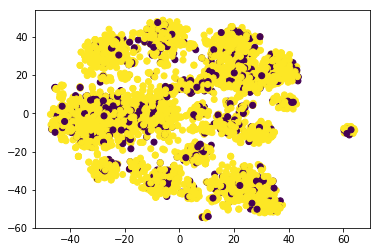

In [ ]:
for_tsne_df = pd.DataFrame(for_tnse, columns=['Dimension_x', 'Dimension_y', 'project_is_approved'])
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['project_is_approved'])
plt.show()

Note: I would like to give label for X and y axis and also the title for that i have to run the glove model for calculating AVG_W2V model and that would take another 1/2 half and hour to load because of my computational resourses. 

<h2> 2.2 TSNE with `TFIDF` encoding of `project_title` feature </h2>

In [ ]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_tfidf.shape)
print(price_standardised.shape)

(109248, 9)
(109248, 30)
(109248, 3335)
(109248, 1)


In [ ]:
from scipy.sparse import hstack
X_1 = hstack((categories_one_hot, sub_categories_one_hot, text_tfidf, price_standardised))
print(X_1.shape)

(109248, 3375)


In [ ]:
#converting sparse to dense matrix using X.toarray()
bbb = X_1.toarray()

In [ ]:
bbb.shape

(109248, 3375)

In [ ]:
X_1 = bbb[:5000, :]
print(X_1.shape)

(5000, 3375)


In [ ]:
#Pickling the X_1
with open('X_1', 'wb') as f:
    pickle.dump(X_1, f)

In [ ]:
#Building TsNE
tsne_1 = TSNE(n_components=2, perplexity=30, learning_rate=200)
X_embedding_1 = tsne_1.fit_transform(X_1)

In [ ]:
#concatinating X_emedding and y
for_tnse_1 = np.hstack((X_embedding_1, y.reshape(-1,1)))

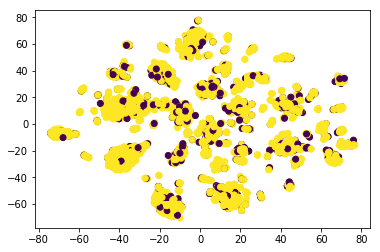

In [ ]:
for_tsne_df_1 = pd.DataFrame(for_tnse_1, columns=['Dimension_x', 'Dimension_y', 'project_is_approved'])
plt.scatter(for_tsne_df_1['Dimension_x'], for_tsne_df_1['Dimension_y'], c=for_tsne_df_1['project_is_approved'])
plt.show()

<h2> 2.3 TSNE with `AVG W2V` encoding of `project_title` feature </h2>

In [ ]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(len(avg_W2V_vectors))
print(price_standardised.shape)

(109248, 9)
(109248, 30)
109248
(109248, 1)


In [ ]:
#Converting the avg_W2V vector into array
avg_W2V_vectors = (np.asarray(avg_W2V_vectors))

In [ ]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(avg_W2V_vectors.shape)
print(price_standardised.shape)

(109248, 9)
(109248, 30)
(109248, 300)
(109248, 1)


In [ ]:
#Merging all the features
from scipy.sparse import hstack
X_3 = hstack((categories_one_hot, sub_categories_one_hot, avg_W2V_vectors, price_standardised))
print(X_3.shape)

(109248, 340)


In [ ]:
X_3 = X_3.toarray()

In [ ]:
print(X_3.shape)

(109248, 340)


In [ ]:
#dumping it fully
with open('X_3_full', 'wb') as f:
    pickle.dump(X_3, f)

In [ ]:
X_3 = X_3[:5000,:]
print(X_3.shape)

(5000, 340)


In [ ]:
#dumping it as 5k for future
with open('X_3', 'wb') as f:
    pickle.dump(X_3, f)

In [ ]:
#Building TSNE
from sklearn.manifold import TSNE
tsne_3 = TSNE(n_components=2, perplexity=500, learning_rate=750)
X_embedding_3 = tsne_3.fit_transform(X_3)

In [ ]:
#concatination X_embedding and y
#for_tnse_1 = np.hstack((X_embedding_1, y.reshape(-1,1)))
for_tsne_3 = np.hstack((X_embedding_3, y.reshape(-1,1)))

In [ ]:
for_tsne_3.shape

(5000, 3)

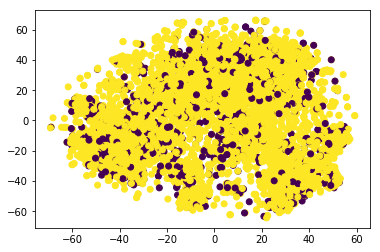

In [ ]:
for_tsne_df_3 = pd.DataFrame(for_tsne_3, columns=['Dimension_x', 'Dimension_y', 'project_is_approved'])
plt.scatter(for_tsne_df_3['Dimension_x'], for_tsne_df_3['Dimension_y'], c=for_tsne_df_3['project_is_approved'])
plt.show()

<h2> 2.4 TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature </h2>

In [ ]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(len(tfidf_W2V_vectors))
print(price_standardised.shape)

(109248, 9)
(109248, 30)
109248
(109248, 1)


In [ ]:
#Converting the tfidf_W2V vector into array
tfidf_W2V_vectors = (np.asarray(tfidf_W2V_vectors))

In [ ]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(tfidf_W2V_vectors.shape)
print(price_standardised.shape)

(109248, 9)
(109248, 30)
(109248, 300)
(109248, 1)


In [ ]:
X_4 = hstack((categories_one_hot,sub_categories_one_hot, tfidf_W2V_vectors, price_standardised))

In [ ]:
X_4.shape

(109248, 340)

In [ ]:
X_4 = X_4.toarray()

In [ ]:
X_4.shape

(109248, 340)

In [ ]:
#dumping it full
with open('X_4_full', 'wb') as f:
    pickle.dump(X_4, f)

In [ ]:
X_4 = X_4[:5000, :]
print(X_4.shape)

(5000, 340)


In [ ]:
#Pickling it 
with open('X_4', 'wb') as f:
    pickle.dump(X_4, f)

In [ ]:
tsne_4 = TSNE(n_components=2, perplexity=100, learning_rate=1000)
X_embedding_4 = tsne_4.fit_transform(X_4)

In [ ]:
for_tsne_4 = np.hstack((X_embedding_4, y.reshape(-1,1)))
print(for_tsne_4.shape)

(5000, 3)


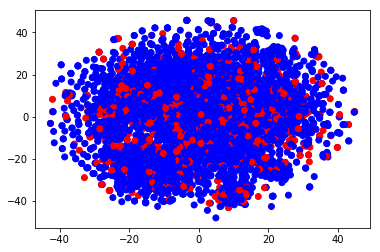

In [ ]:
for_tsne_df_4 = pd.DataFrame(data=for_tsne_4, columns=['Dimension_x','Dimension_y','project_is_approved'])
colors = {0:'red', 1:'blue'}
plt.scatter(for_tsne_df_4['Dimension_x'], for_tsne_df_4['Dimension_y'], c= for_tsne_df_4['project_is_approved'].apply(lambda x: colors[x]))
plt.show()

# Summary

The plot tell us that the data isn't much changing even after we tried the different perplexity and learning rate. So it tells us that this is the originality of the data in 2 dimensions. 

#### Note: 
- For the memory constraint i took only 5000 points. If we have good computational resourse then we can use more points in the plot.

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [ ]:
%whos

Variable                               Type               Data/Info
-------------------------------------------------------------------
CountVectorizer                        type               <class 'sklearn.feature_e<...>on.text.CountVectorizer'>
Counter                                type               <class 'collections.Counter'>
PrettyTable                            type               <class 'prettytable.PrettyTable'>
Processed_title                        list               n=109248
StandardScaler                         type               <class 'sklearn.preproces<...>ing.data.StandardScaler'>
TSNE                                   type               <class 'sklearn.manifold.t_sne.TSNE'>
Tf_idf_model                           TfidfVectorizer    TfidfVectorizer(analyzer=<...>n        vocabulary=None)
TfidfVectorizer                        type               <class 'sklearn.feature_e<...>on.text.TfidfVectorizer'>
X_3                                    ndarray            109248x

# To save

- categorical features = categories_one_hot, sub_categories_one_hot
- numerical features = price ==============>
- project_title(BOW) = text_bow_title
- processed_essay(BOW) = text_bow_essay
- project_title(tfidf) = text_tfidf
- processed_essay(tfidf) = text_tfidf_essay
- project_title(AVG_w2v) = avg_W2V_vectors
- processed_essay (avg_w2v) = avg_w2v_vector
- project_title(tfidf_w2v) = tfidf_W2V_vectors
- processed_essay(tfidf_w2v) = tfidf_w2v_vectors

In [ ]:
with open('tfidf_w2v_essay', 'wb') as f:
    pickle.dump(tfidf_w2v_vectors, f)

In [ ]:
(np.array(tfidf_w2v_vectors)).shape

(109248, 300)

In [ ]:
project_data.shape

(109248, 20)

In [ ]:
.shape

AttributeError: 'list' object has no attribute 'shape'